# Extract Rendered Images

## Purpose of this notebook

> Create image rendering pipeline to test CLIP with custom mesh data.

<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">

<div class="alert alert-danger" role="alert">

  <h4 class="alert-heading">⚠️ Alert</h4>

Activate `text2mesh` environment before continuing.
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# move to text2mesh root
import os
os.chdir('../Baselines/text2mesh')

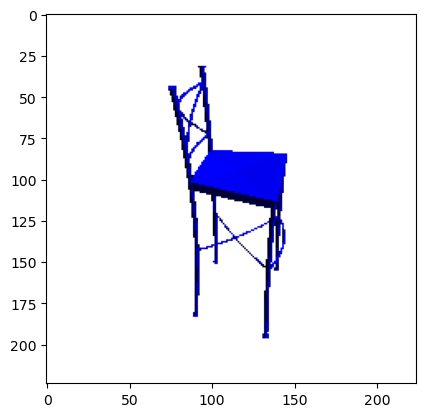

In [15]:
# render images from mesh (check out args)
from helpers import get_res, init_torch, get_background
from Normalization import MeshNormalizer
import matplotlib.pyplot as plt
from render import Renderer
from utils import device 
from mesh import Mesh
import torch

# index of the rendered images to plot
i = 1

# input set up (copied from demo)
args = {
    'obj_path': '/home/bellatini/DL3D-Practical/Baselines/text2mesh/data/source_meshes/chair_normalized.obj',
    'clipmodel': 'ViT-B/32',
    'frontview_center': (1.96349, 0.6283),
    'n_views': 5,
    'show': False,
    'frontview_std': 4,
    'return_views': True,
    'seed': 78942387,
    'background': (1.0,1.0,1.0) # white: (1.0,1.0,1.0), black: (0.0,0.0,0.0) or None
}

torch = init_torch(torch, args['seed'])
background = get_background(args['background'], torch, device)
res = get_res(args['clipmodel'])
render = Renderer(dim=(res, res))
mesh = Mesh(args['obj_path'])
MeshNormalizer(mesh)()
rendered_images, elev, azim = render.render_front_views(mesh, num_views=args['n_views'],
                                                        show=args['show'],
                                                        center_azim=args['frontview_center'][0],
                                                        center_elev=args['frontview_center'][1],
                                                        std=args['frontview_std'],
                                                        return_views=args['return_views'],
                                                        background=background)

num_img = rendered_images.size()[0]
arr = rendered_images[i].permute(1, 2, 0).cpu().numpy()
plt.imshow(arr)

### Conclusion

> The image rendering process has been validated for testing CLIP